<a href="https://colab.research.google.com/github/daikichiba9511/study_log/blob/master/study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

X=np.array([[0,1,0,1],
                      [1,0,1,0],
                      [0,0,0,1],
                      [1,0,1,0]])
y=np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
  #クラスに対してループ
  #それぞれの特徴量ごとに非ゼロの数を（加算）で数える
  counts[label]=X[y==label].sum(axis=0)
  print("Feature counts:\n{}".format(counts))
  

Feature counts:
{0: array([0, 1, 0, 2])}
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 0])}


**pythonで始める機械学習p69**

- ナイーブベイズクラス分類機

 **p70決定木**
 

In [2]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 20.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


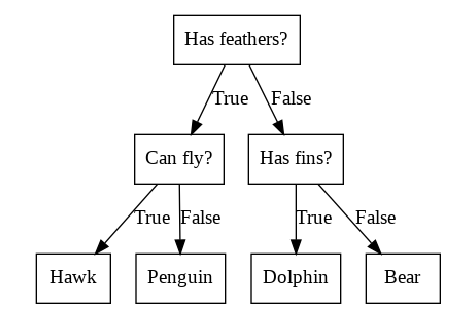

In [3]:
import mglearn

mglearn.plots.plot_animal_tree()

In [4]:
#決定木の構築
#p74事前枝狩りの効果をcancerデータでみる
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
      cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.937


過剰適合を起こさないように木がある深さになったら成長を止める。事前刈り取り

In [5]:
tree= DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set 0.988
Accuracy on test set 0.951


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

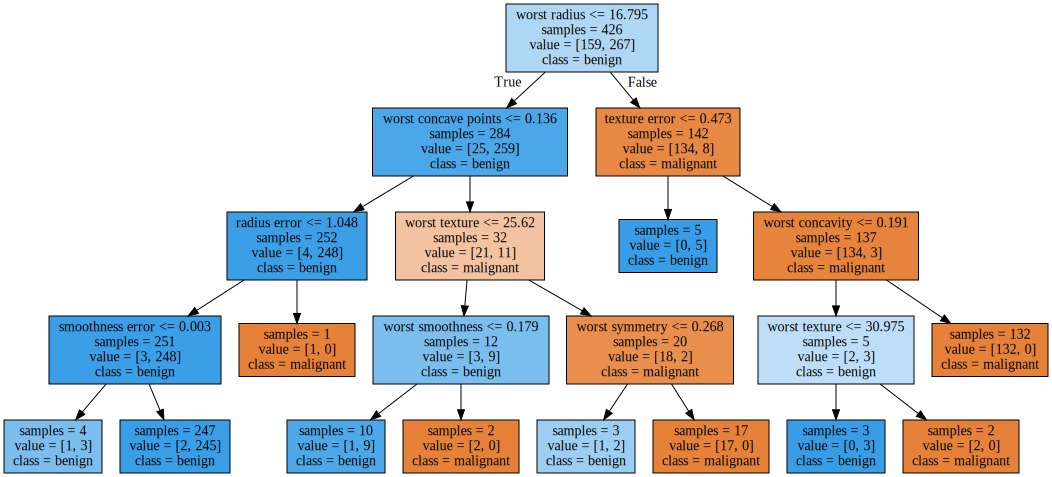

In [7]:
import graphviz

with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

In [8]:
#特徴量の重要性
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


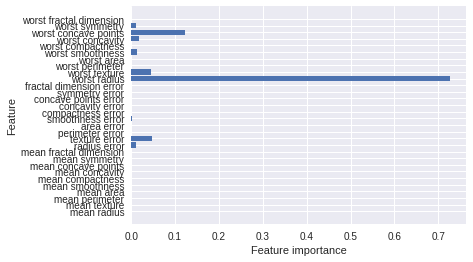

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#特徴量の重要度をみる関数を定義（cancer)
def plot_feature_importances_cancer(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


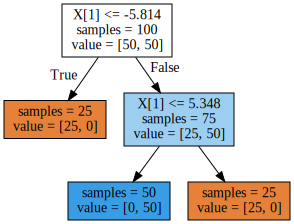

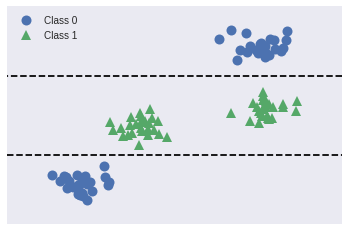

In [10]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

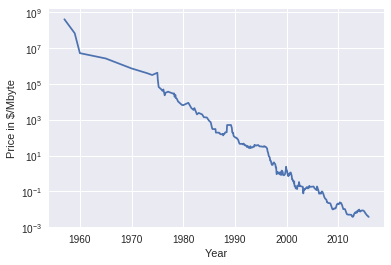

In [11]:
import os 
import pandas as pd

ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

 **p80 2000年までのデータを使って予測する**
 
 - DecisionTreeRegressor(決定木回帰)とLinearRegression(線形回帰)を用いて比較

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#過去のデータを用いて2000年以降の価格を予測する
data_train= ram_prices[ram_prices.date<2000]#2000年までのram_pricesをdara_trainに格納
data_test=ram_prices[ram_prices.date>=2000]#2000年以降のデータをテストにもちいる

#日付を基づいて価格を予測
X_train=data_train.date[:,np.newaxis]#newaxisで引き伸ばし
#データとターゲットの関係を単純にする為に対数変換
y_train=np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg= LinearRegression().fit(X_train,y_train)

#全ての価格を予測
X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#対数変換をキャンセルする為に逆変換
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)



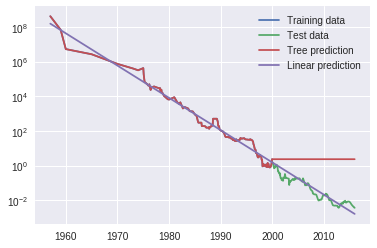

In [13]:
plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend()

**決定木のアンサンブル法**

- ランダムフォレスト


ランダムフォレストの構築


In [14]:
#randomforest , two_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train , y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

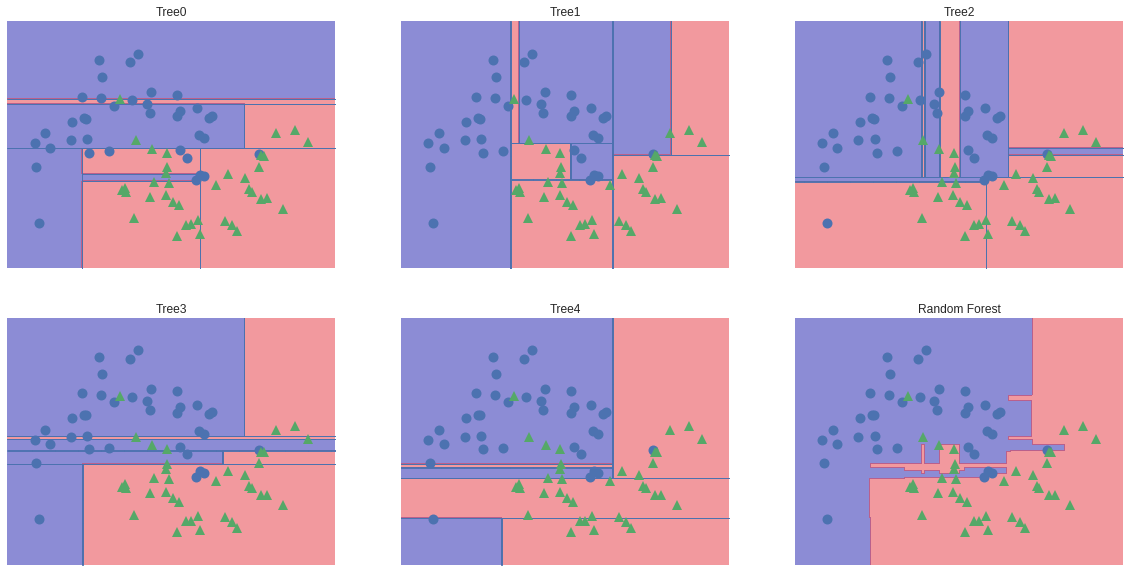

In [15]:
#それぞれの決定木で学習によって決まった決定境界とランダムフォレストによって行われる集合的な予測の可視化
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
  
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [16]:
#cancerに対して１００個決定木を用いたランダムフォレスト
X_train,X_test,y_train,y_test=train_test_split(
                      cancer.data,cancer.target,random_state=0)
#モデルの指定
forest=RandomForestClassifier(n_estimators=100,random_state=0)#n_estimatorsで生成する決定木の数を指定
#学習
forest.fit(X_train,y_train)

#trainingとtestに対する正解率
print("Accuracy on Training data:{}".format(forest.score(X_train,y_train)))
print("Accuracy on Test data:{}".format(forest.score(X_test,y_test)))

Accuracy on Training data:1.0
Accuracy on Test data:0.972027972027972


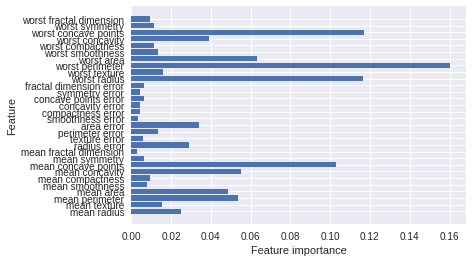

In [17]:
#forestで特徴量の重要度をみる
plot_feature_importances_cancer(forest)

In [18]:
#勾配ブーyスティング回帰木
from sklearn.ensemble import GradientBoostingClassifier

#データの分割
X_train,X_test,y_train,y_test=train_test_split(
                                          cancer.data,cancer.target,random_state=0)
#モデルの定義
gbrt = GradientBoostingClassifier(random_state=0)
#学習
gbrt.fit(X_train,y_train)

#正解率
print("Accuracy on training data;{}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test data;{}".format(gbrt.score(X_test,y_test)))


Accuracy on training data;1.0
Accuracy on test data;0.958041958041958


In [19]:
#訓練セットに対して１００％が出てるのでおそらく過剰適合、過学習している
#事前枝狩りまたは学習率を下げる
#モデルの定義、引数でmax_depthを１にして事前枝狩り
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
#学習
gbrt.fit(X_train,y_train)

#正解率
print("Accuracy on training data;{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test data;{:.3f}".format(gbrt.score(X_test,y_test)))


Accuracy on training data;0.991
Accuracy on test data;0.972


In [20]:
#次は学習率を0.01に下げる
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

#正解率
print("Accuracy on training data;{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test data;{:.3f}".format(gbrt.score(X_test,y_test)))


Accuracy on training data;0.988
Accuracy on test data;0.965


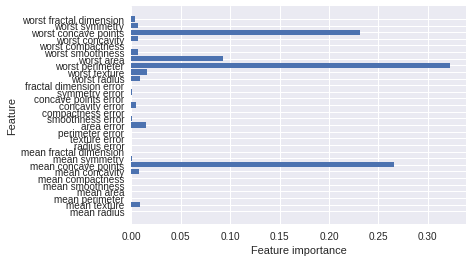

In [21]:
#特徴量の重要度をみる
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
#学習
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)


**カーネル法を用いたsvm**

カーネル法を用いたサポートベクトルマシーンの背後にある数学は難しい


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Feature 1')

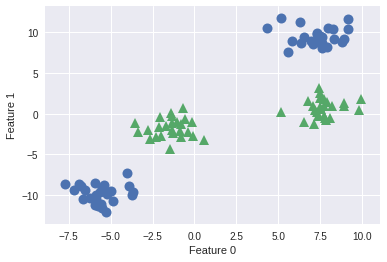

In [22]:
#p91
X,y=mglearn.datasets.make_blobs(centers =4,random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

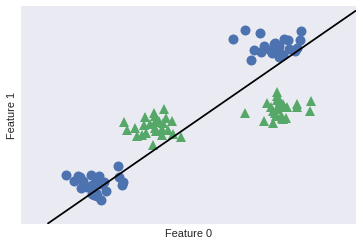

In [23]:
#線形モデルによるクラス分類では直線で分類することはできないからこんな感じのデータセットではうまくいかない
from sklearn.svm import LinearSVC

#モデル、学習
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



Text(0.5, 0, 'feature1**2')

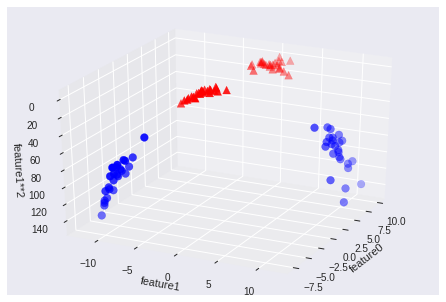

In [24]:
#2番目の特徴量の2乗を追加
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D , axes3d
figure=plt.figure()

#3Dで可視化
ax=Axes3D(figure,elev=-152,azim=-26)
#y==0の点をプロットしてからy==1の点をプロット
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1**2')

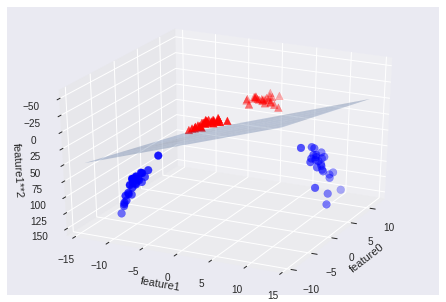

In [25]:
#3次元空間内の平面
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#線形決定境界を描画
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

Text(0, 0.5, 'Feature1')

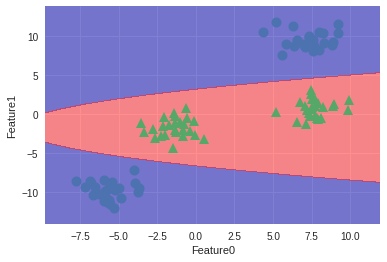

In [26]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

 **カーネルトリック**
 
 3/19

Text(0, 0.5, 'Feature 1')

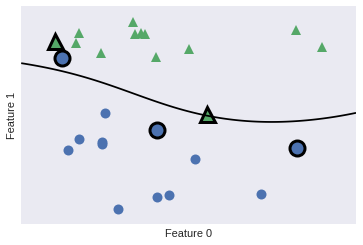

In [27]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#サポートベクタをプロットする
sv=svm.support_vectors_
#サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

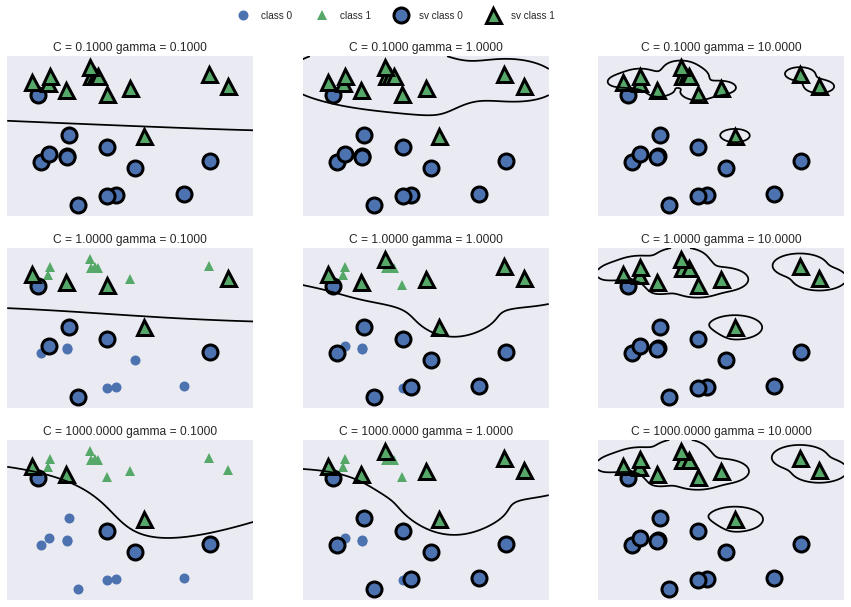

In [28]:
#SVMパラメータの調節
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
  for a,gamma in zip(ax,range(-1,2)):
    mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
    
axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],
                ncol=4,loc=(.9,1.2))


In [29]:
'''RBFカーネル法を用いたSVMをcancerデータセットに適用'''

#データの分割　
X_train,X_test,y_train,y_test=train_test_split(
            cancer.data,cancer.target,random_state=0)

#モデルの定義
svc=SVC()
#fitting
svc.fit(X_train,y_train)

#accuracy
print("Acccuracy on training data:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test data:{:.2f}".format(svc.score(X_test,y_test)))

Acccuracy on training data:1.00
Accuracy on test data:0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


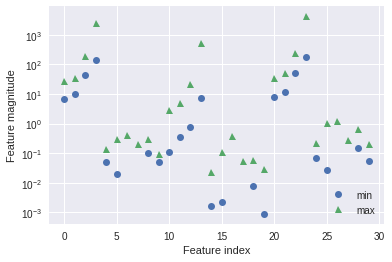

In [30]:
#個々の特徴量の最大値と最小値をプロット
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [31]:
#svm の為のデータの前処理
#scaleを揃えたい
#訓練セットの特徴量ごとに最小値を計算
min_on_training=X_train.min(axis=0)
#訓練セットの特徴量ごとにレンジ（最大値-最小値）を計算
range_on_training=(X_train-min_on_training).max(axis=0)

#最小値を引いてレンジで割る
#個々の特徴量はmin=0,max=1となる
X_train_scaled=(X_train-min_on_training)/range_on_training
print("Minimum fot each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature \n{}".format(X_train_scaled.max(axis=0)))

Minimum fot each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [0]:
#testデータセットに対しても同じ処理を行う
#訓練セットの最小値とレンジを用いる（詳細は４章）
X_test_scaled=(X_test - min_on_training)/range_on_training


In [33]:
svc=SVC()
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set:  {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set : {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:  0.948
Accuracy on test set : 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
#Cやgammaを調節
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
#クラス分類器の不確実性推定
#GradientBoostingClassifierを用いる
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y=make_circles(noise=0.25,factor=0.5,random_state=1)

#わかりやすいようにクラスを'blue'と 'red'にする
y_named=np.array(["blue","red"])[y]

#train_test_splitは任意の数の配列に適用できる
#全ての配列は整合するように分割される
X_train,X_test,y_train_named,y_test_named,y_train,y_test=\
    train_test_split(X,y_named,y,random_state=0)

#勾配ブースティングモデルを構築
gbrt= GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

**決定関数**

2クラス分類の場合、decision_functionの結果の配列は(n_samples,)の形になって、サンプルごとに１つの浮動小数点数が返される

In [36]:
print("X_test.shape:{}".format(X_test.shape))
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))

X_test.shape:(25, 2)
Decision function shape:(25,)


In [37]:
#decision_functionの最初のいくつかを表示する
print("Decision function: \n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function: 
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


決定関数の符号だけ見れば予測クラスがわかる

In [38]:
#決定関数の値に閾値を適用して真偽に分類する
print("Thresholded decision function:\n{}".format(
        gbrt.decision_function(X_test)>0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [39]:

#True/Falseを0/1に
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
#0/1をclasses_のインデックスに使う
pred=gbrt.classes＿[greater_zero]
#predはgbrt.predictの出力と同じになる
print("pred is equal to prediction:{}".format(
                      np.all(pred==gbrt.predict(X_test))))

pred is equal to prediction:True


decision_funcitonはレンジが決まってなくて、データとモデルパラメータによる


In [40]:
decision_function=gbrt.decision_function(X_test)
print("Decision function minimum:{:.2f} maximum{:.2f}".format(np.min(decision_function) , np.max(decision_function)))

Decision function minimum:-7.69 maximum4.29


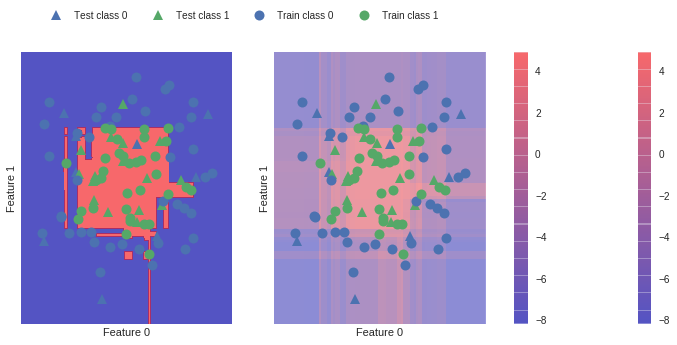

In [41]:
fig , axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,
                               fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,
                                            fill=True,cm=mglearn.cm2)
score_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)
for ax in axes:
  #訓練データポイントとテストデータポインtをプロット
  mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,
                          markers='^',ax=ax)
  mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,
                          markers='o',ax=ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
  cbar=plt.colorbar(score_image,ax=axes.tolist())
  axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

p119

**確率の予測**




In [42]:
print("shape of probablities:{}".format(gbrt.predict_proba(X_test).shape))

shape of probablities:(25, 2)


In [43]:
print("Predicted probabilities:\n {}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


あるモデルが報告する確信度実際の正答率と一致する時、**較正されている**　という



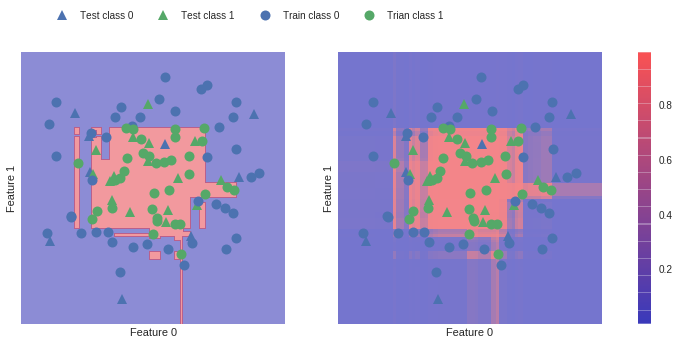

In [44]:
#データセットの決定境界とクラス１になる確率を示す
fig,axes=plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(
            gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
score_image=mglearn.tools.plot_2d_scores(
             gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
  #訓練データポイントとテストデータポイントをプロット
  #plot training and test points
  mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
  mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
  
cbar=plt.colorbar(score_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Trian class 1"],ncol=4,loc=(.1,1.1))

*h1 2.4.3 h1

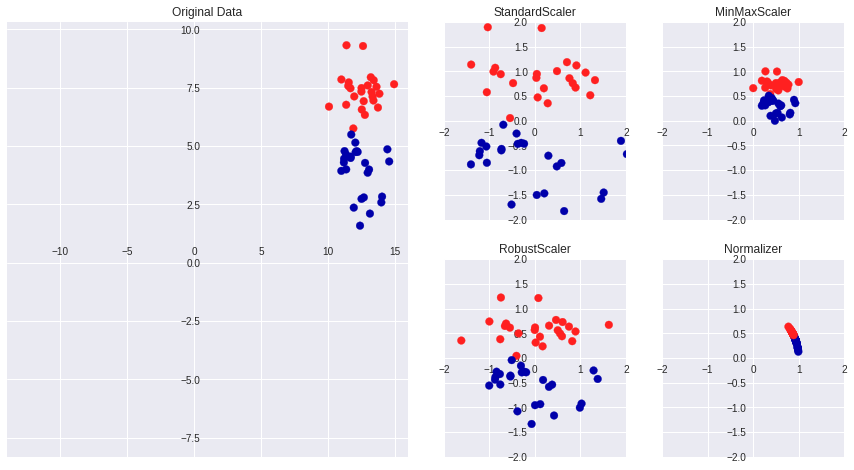

In [45]:
#データセットに対する様々なスケール変換と前処理結果
mglearn.plots.plot_scaling()

In [46]:
#データセットをロードし。訓練セットとテストセットに分割
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [0]:
#前処理を実装したクラスをインポートして、インスタンスを生成
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

- fitメソッドを訓練データに対して適用、スケール変換器を適合
  - MinMaxScalerの場合、訓練データの各データ中の各特徴量の最小値と最大値を計算
  

In [48]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
#スケール変換、trainsformメソッド
#データを変換
X_train_scaled = scaler.transform(X_train)
#スケール変換の前後のデータ特性をプリント
print("Transformed shape:{}".format(X_train_scaled.shape))
print("per-feature minimum before scaling;\n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling;\n{}".format(X_train.max(axis=0)))
print("per-feature minimum after scaleing;\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature minimum after scaleing;\n{}".format(X_train_scaled.max(axis=0)))

Transformed shape:(426, 30)
per-feature minimum before scaling;
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling;
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaleing;
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature minimum after scaleing;
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [50]:
#testセットの方も変換
X_test_scaled=scaler.transform(X_test)
#スケール変換の前後のデータ特性をプリント
print("Transformed shape:{}".format(X_test_scaled.shape))
print("per-feature minimum before scaling;\n{}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling;\n{}".format(X_test.max(axis=0)))
print("per-feature minimum after scaleing;\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature minimum after scaleing;\n{}".format(X_test_scaled.max(axis=0)))

Transformed shape:(143, 30)
per-feature minimum before scaling;
[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling;
[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
per-feature minimum after scaleing;
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

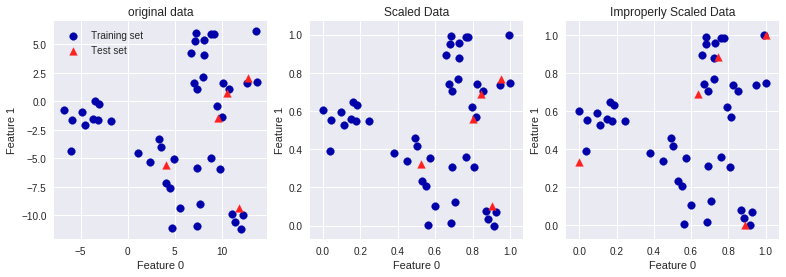

In [51]:
from sklearn.datasets import make_blobs
#合成データを作成
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
#訓練セットとテストセットに分割
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

#訓練セットとテストセットをプロット
fig , axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)

axes[0].legend(loc=('upper left'))
axes[0].set_title("original data")

#MinMaxScalerでデータをスケール変換
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[1].set_title("Scaled Data")

#テストセットを訓練セットとは別にスケール変換
#最小値と最大値が0,1になる。わかりやすくする為にわざとやっている,実際にはやっては行けない
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)

#間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[2].set_title("Improperly Scaled Data")
     
     
     
for ax in axes:
     ax.set_xlabel("Feature 0")
     ax.set_ylabel("Feature 1")
     



In [52]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy:0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
#0~1スケール変換で前処理
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#変換された訓練データで学習
svm.fit(X_train_scaled,y_train)

#変換されたテストセットでスコア計算
print("Scaled test set accuracy : {:.2f}".format(
              svm.score(X_test_scaled,y_test)))

Scaled test set accuracy : 0.97


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
#平均を０、分散を１に前処理
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#変換された訓練データで学習
svm.fit(X_train_scaled,y_train)

print("Scaled test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

Scaled test set accuracy:0.96


*主成分分析 *

特徴量を関連しないように回転する手法

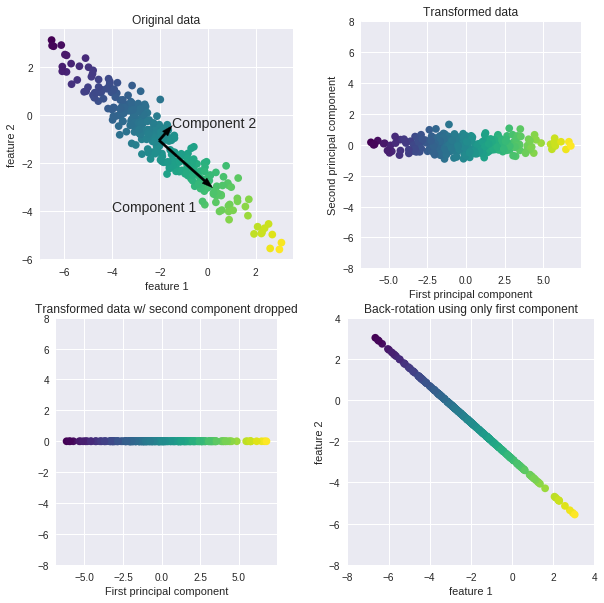

In [55]:
mglearn.plots.plot_pca_illustration()

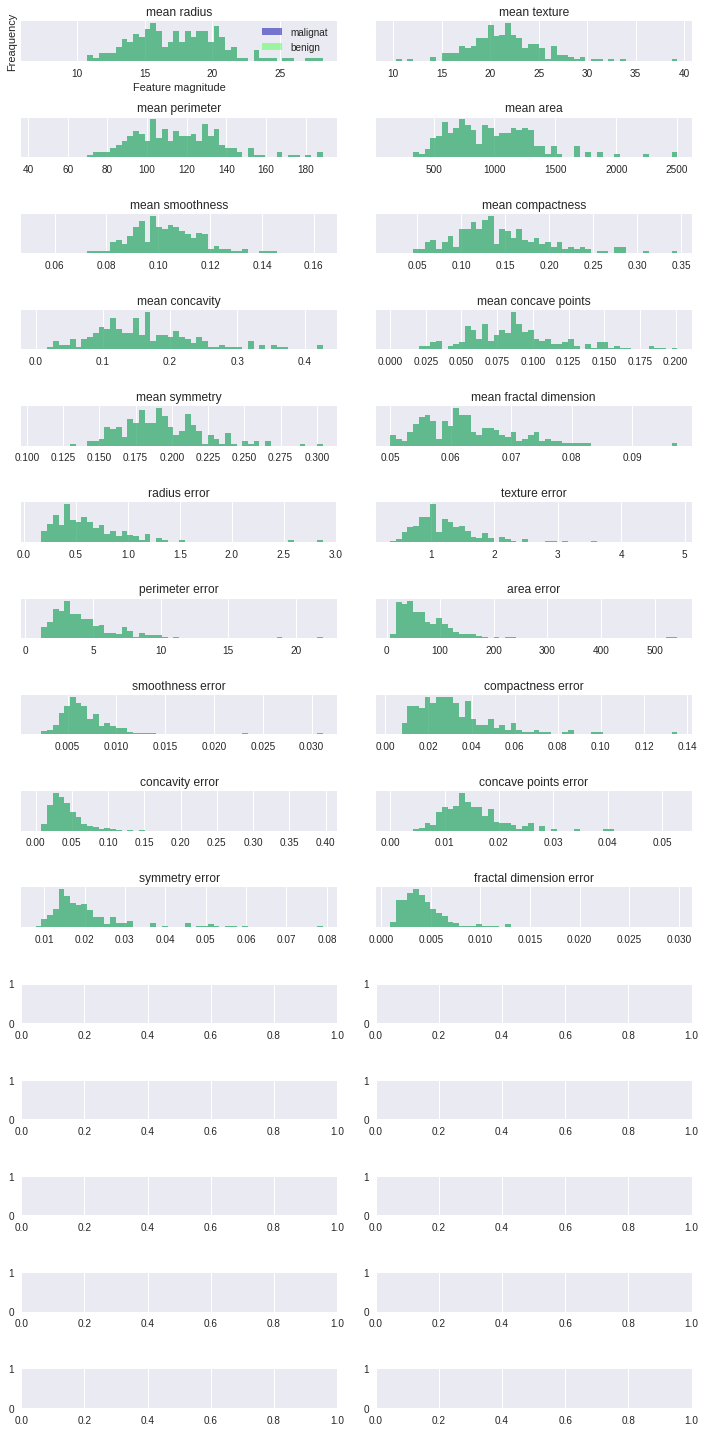

In [56]:
#cancerデータセットに対して、特徴量ごとに２つのクラスのヒストグラムをかく
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(20):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant [:,i],   bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
  
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Freaquency")
ax[0].legend(["malignat","benign"],loc="best")
fig.tight_layout()

In [0]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

scaler=StandardScaler()
scaler.fit(cancer.data)

X_scaled=scaler.transform(cancer.data)

In [58]:
from sklearn.decomposition import PCA
#データの最初の２つの主成分を維持する
pca=PCA(n_components=2)
#cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

#最初の２つの主成分に対して、データポイントを変換
X_pca=pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second Principal component')

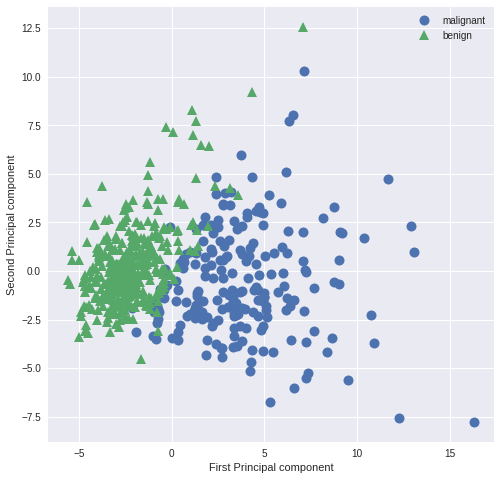

In [59]:
#第１主成分と第２主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

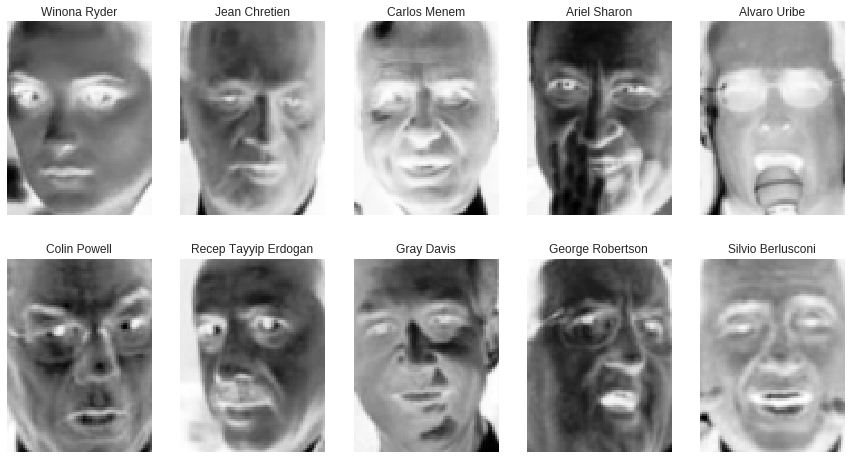

In [60]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

fix,axes=plt.subplots(2,5,figsize=(15,8),
                    subplot_kw={'xticks':(),'yticks':()} )
for target,image,ax in zip(people.target,people.images,axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [61]:
print("people image shapel:{}".format(people.images.shape))
print("Number of class:{}".format(len(people.target_names)))

people image shapel:(3023, 87, 65)
Number of class:62


In [62]:
#各データの出現回数をカウント
counts=np.bincount(people.target)
#ターゲット名と出現回数を並べて表示
for i ,(count,name) in enumerate(zip(counts,people.target_names)):
  print("{0:25}{1:3}".format(name,count),end=' ')
  if (i+1)%3==0:
    print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [0]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target==target)[0][:50]]=1
  
X_people=people.data[mask]
y_people=people.target[mask]

#0~255で表現されているので、グレースケールの値を0~1の間に変換
X_people=X_people/255

In [64]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,random_state=0)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

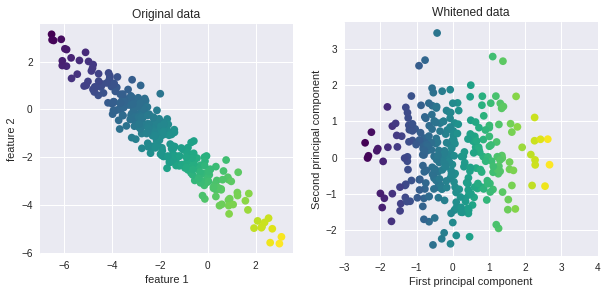

In [65]:
mglearn.plots.plot_pca_whitening()

In [66]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [67]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy: 0.33


In [68]:
print("pca.components_.shape:{}".format(pca.components_.shape))

pca.components_.shape:(100, 5655)


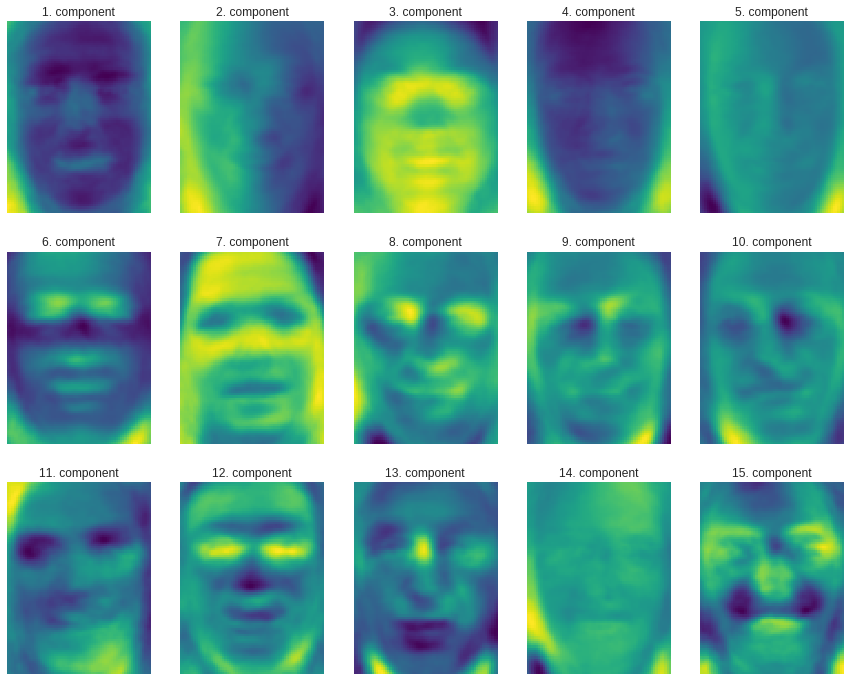

In [69]:
fix,axes = plt.subplots(3,5,figsize=(15,12),
                       subplot_kw={'xticks':(),'yticks':()})
for i ,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape),
           cmap='viridis')
  ax.set_title("{}. component".format(i+1))

Text(0, 0.5, 'Second principal component')

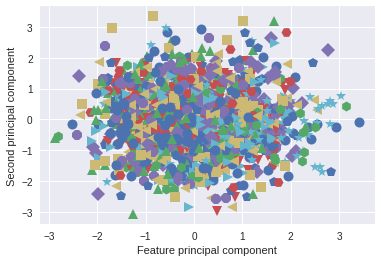

In [70]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("Feature principal component")
plt.ylabel("Second principal component")


*NMF*

非負値行列因子分解


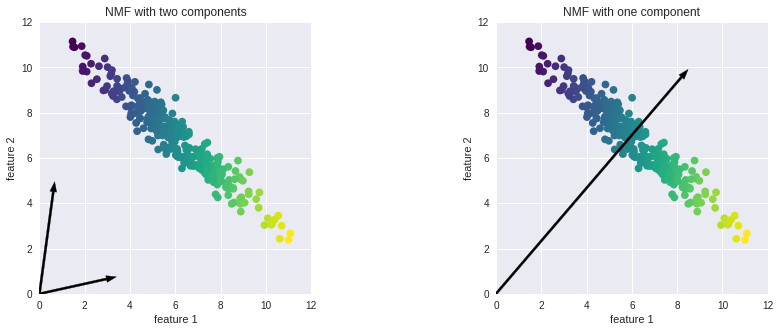

In [71]:
mglearn.plots.plot_nmf_illustration()

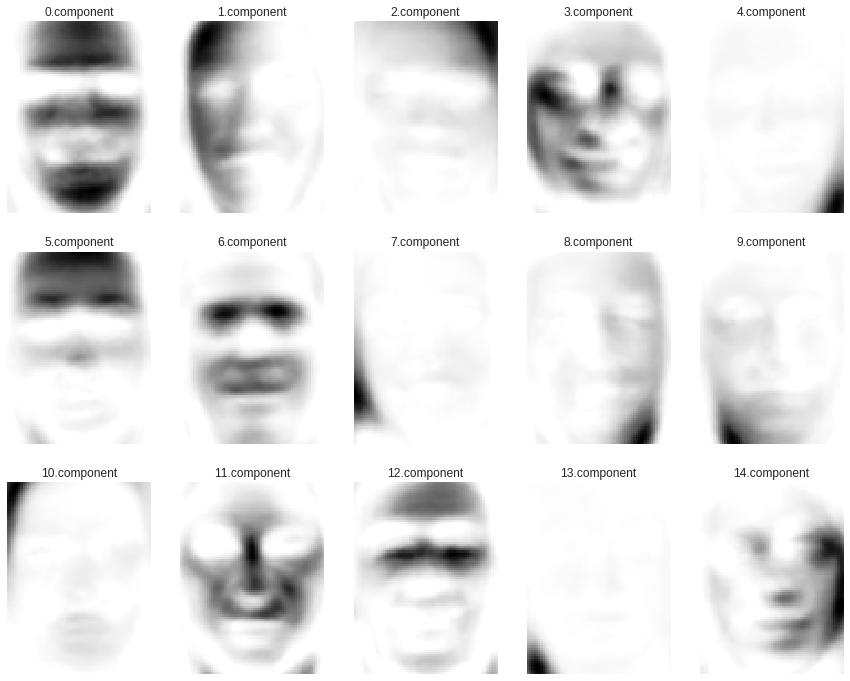

In [72]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fix,axes=plt.subplots(3,5,figsize=(15,12),
                                  subplot_kw={'xticks':(),'yticks':()})
for i , (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title("{}.component".format(i))

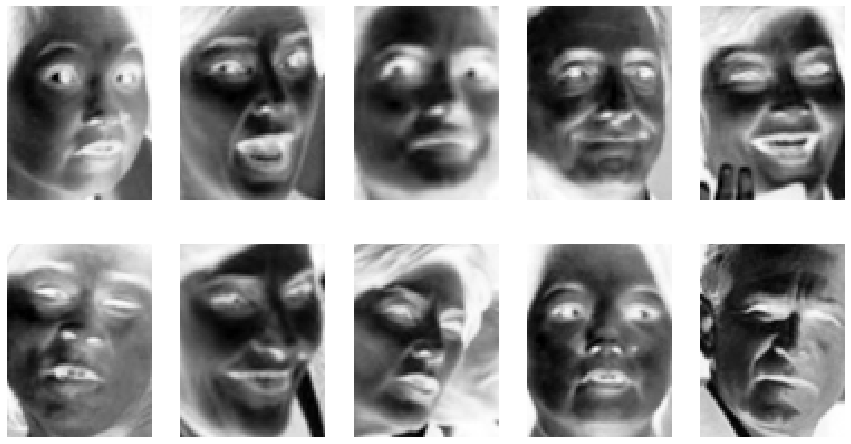

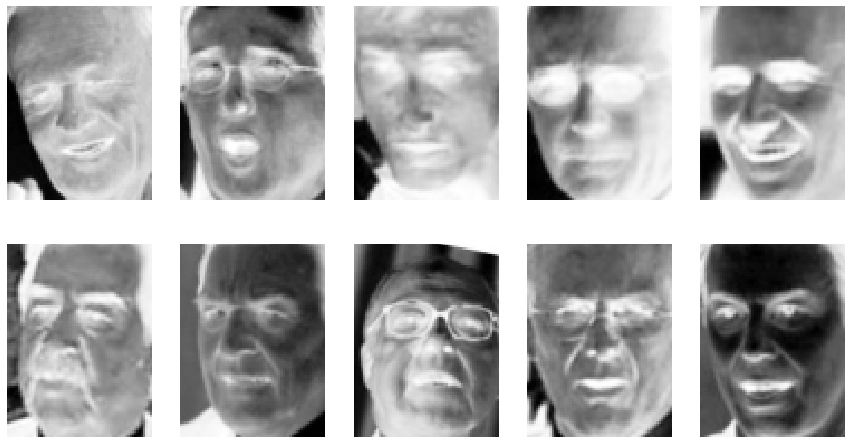

In [73]:
compn=3
#3つ目の成分でソート、最初の10個の画像を表示
inds=np.argsort(X_train_nmf[: , compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))
  
compn=7
#7つ目の成分でソート、最初の10個の画像を表示
inds=np.argsort(X_train_nmf[: , compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

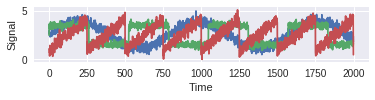

In [74]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [75]:
#データを混ぜて100次元の状態を作る
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurements: {}".format(X.shape))


Shape of measurements: (2000, 100)


In [76]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print("Recoverd signal shape: {}".format(S_.shape))

Recoverd signal shape: (2000, 3)


In [0]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

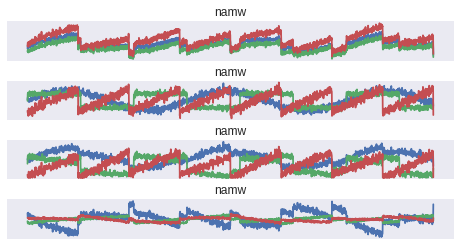

In [78]:
models=[X,S,S_,H]
names=['Observations(first three measurements)',
      'True sources',
      'NMF recoverd signals',
      'PCA recoverd signals']

fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace': .5},
                     subplot_kw={'xticks':(),'yticks':()})

for model ,name, ax in zip(models,names,axes):
  ax.set_title("namw")
  ax.plot(model[:,:3],'-')

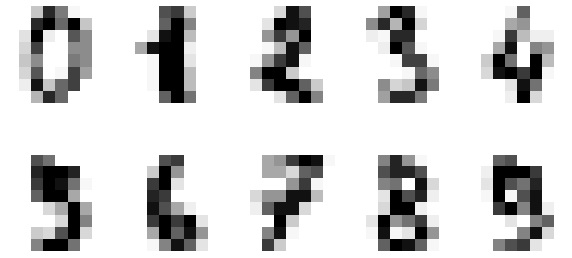

In [79]:
from sklearn.datasets import load_digits
digits=load_digits()

fig,axes=plt.subplots(2,5,figsize=(10,5),
                     subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
  ax.imshow(img)

Text(0, 0.5, 'Second printcipal component')

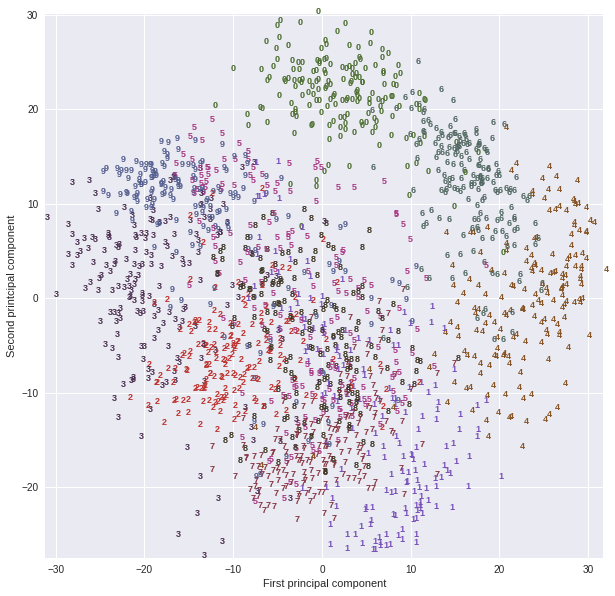

In [80]:
#このデータをpcaを使ってデータを２次元にして可視化
#PCAモデルを構築
pca=PCA(n_components=2)
pca.fit(digits.data)
#数値データを最初の２主成分で変形
digits_pca=pca.transform(digits.data)
colors=["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525",
       "#A83683","#4E655E","#853541","#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())

for i in range(len(digits.data)):
  #散布図を数字でプロット
  plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
          color=colors[digits.target[i]],
                      fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second printcipal component")


In [0]:
#同じデータセットにt-SNEを適用
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
#fitではなくfit_transformを用いる。TSNEにはtransformメソッドはない
digits_tsne=tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

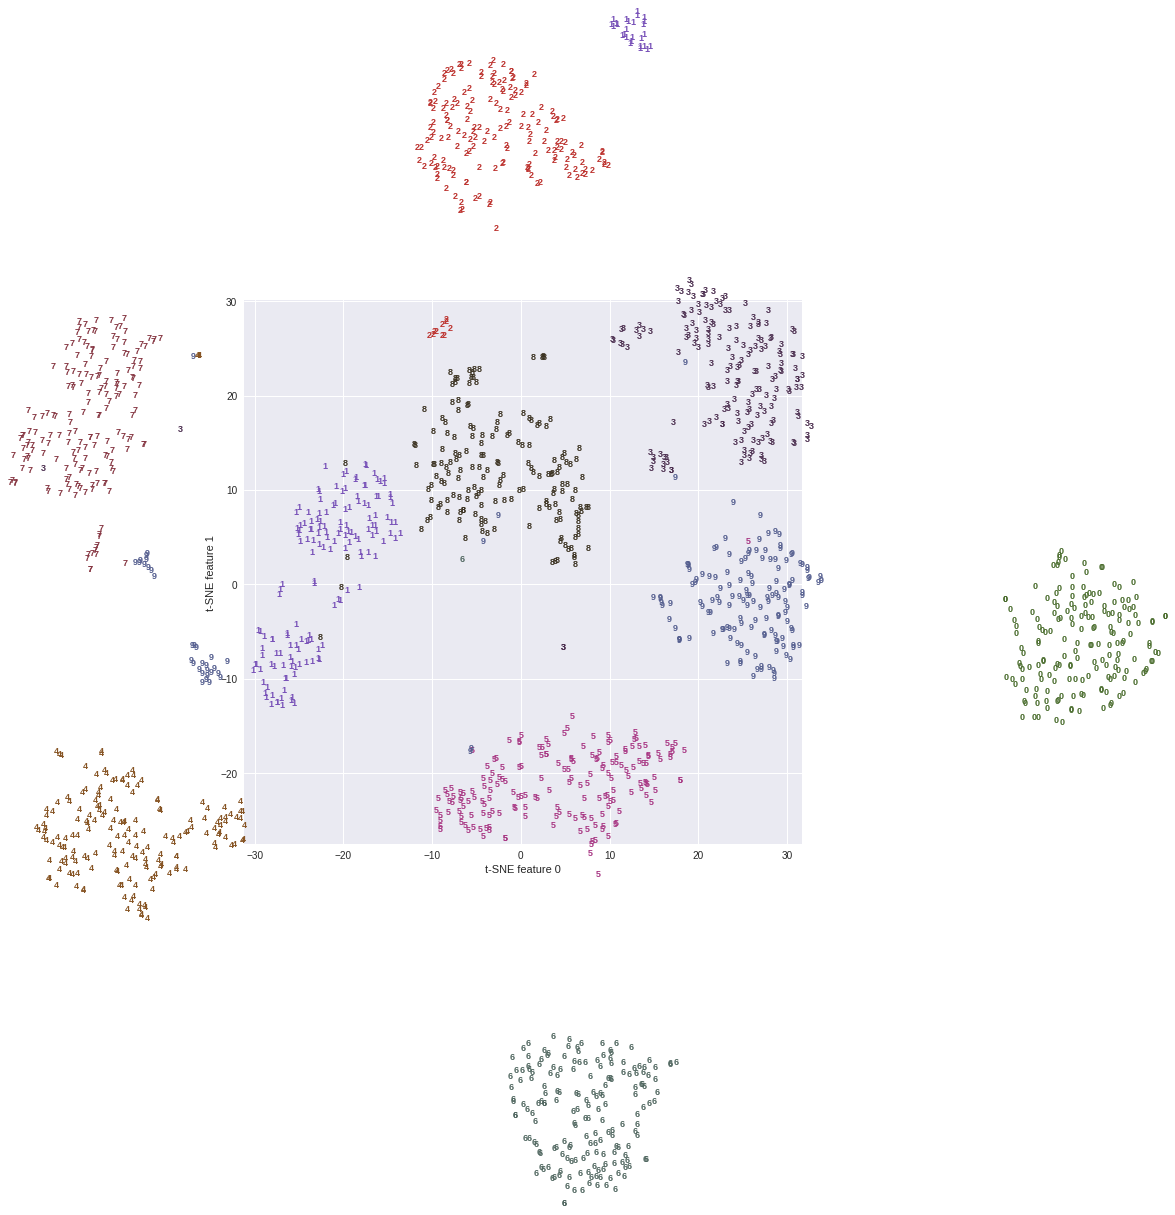

In [82]:
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())

for i in range(len(digits.data)):
  #散布図を数字でプロット
  plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
          color=colors[digits.target[i]],
                      fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")


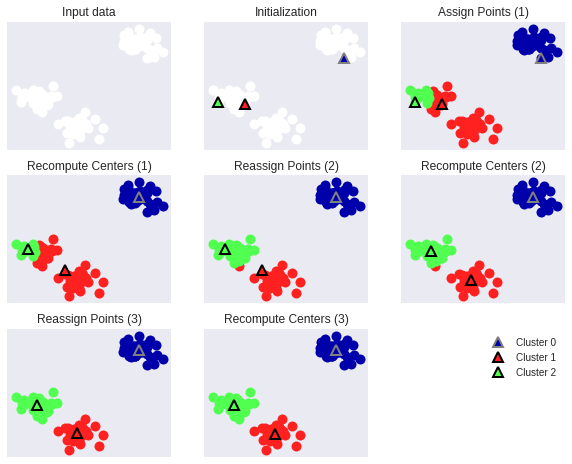

In [83]:
mglearn.plots.plot_kmeans_algorithm()

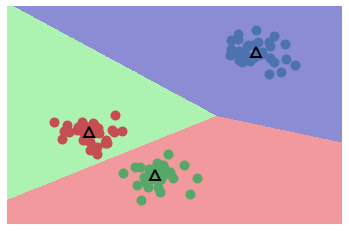

In [84]:
mglearn.plots.plot_kmeans_boundaries()

In [85]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#合成２次元データを作る
X,y=make_blobs(random_state=1)

#クラスタリングモデルを作る
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
print("Cluster membershops: \n{}".format(kmeans.labels_))

Cluster membershops: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [87]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


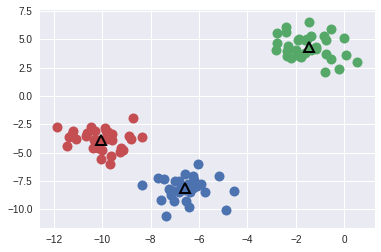

In [88]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(
  kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
  markers='^',markeredgewidth=2)

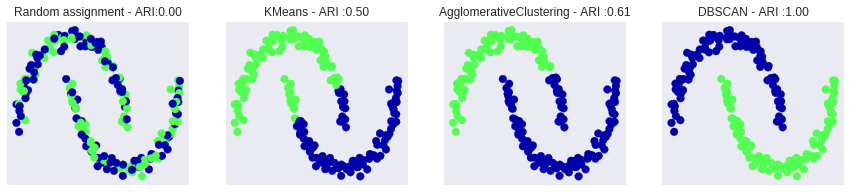

In [89]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

#データを平均０、分散１にスケール変換する
scaler=StandardScaler()
scaler.fit(X)

X_scaled=scaler.transform(X)

fig,axes=plt.subplots(1,4,figsize=(15,3),
                     subplot_kw={'xticks':(),'yticks':()})
#利用するアルゴリズムのリストを作る
algorithms=[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

#参照の為にランダムなクラスタを割り当てる
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment - ARI:{:.2f}".format(
          adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
  #クラスタ割り当てとクラスタセンタをプロット
  clusters=algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,
            cmap=mglearn.cm3,s=60)
  ax.set_title("{} - ARI :{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))